In [2]:
import os
os.chdir("/home/michal/slrm/gen1")

In [34]:
import random
import os
import shutil
import re

short = False
random.seed(42)
energies = [20, 50, 70, 90]

def generate_8digit():
    a = random.randrange(10**8, 10**9, 1)
    return a


reg  = "batch\\d+"

def get_batch():
    mx = -1
    for i in os.listdir("."):
        print(i)
        if re.search(pattern=reg, string=i):
            print(i)
            n  = int(i.lstrip("batch"))
            if mx < n:
                mx = n
    return mx + 1
            

# t = [generate_8digit() for _ in range(20)]

batch_num = get_batch()
print(batch_num)
os.mkdir(f"batch{batch_num}")
ctr = 0
for i in range(len(energies)):
    energy = energies[i]
    for random_seed_index, generated_random_seed in enumerate([generate_8digit() for _ in range(20)]):
        with open("templates/beam-template", "r") as f:
            new_file = f.read()
        new_file = new_file.format(random_seed=generated_random_seed, energy_mean=energy)


        # print(new_file)

        os.mkdir(f"batch{batch_num}/_{ctr}", )
        with open(f"batch{batch_num}/_{ctr}/input_params.txt", "w") as f:
            f.write(str(energy))
        with open(f"batch{batch_num}/_{ctr}/beam.dat","w") as f:
            f.write(new_file)

        ctr += 1


def copy_templates(target_dir):
    shutil.copyfile("./templates/detect-template", target_dir+"/detect.dat")
    shutil.copyfile("./templates/geo-template", target_dir+"/geo.dat")
    shutil.copyfile("./templates/mat.dat", target_dir+"/mat.dat")


for i in os.listdir("."):
    if "batch" in i:
        copy_templates(i)

slurm-237_1.out
batch0
batch0
slurm-237_5.out
slurm-257_15.out
slurm-257_18.out
run_shieldhit.sh
batch1
batch1
slurm-257_6.out
slurm-237_8.out
slurm-237_16.out
slurm-237_14.out
slurm-257_8.out
slurm-257_0.out
slurm-237_17.out
slurm-237_2.out
slurm-237_7.out
slurm-257_13.out
commands
batch4
batch4
slurm-237_9.out
slurm-257_3.out
slurm-257_1.out
templates
batch6
batch6
batch8
batch8
batch3
batch3
slurm-237_11.out
slurm-257_17.out
slurm-257_12.out
slurm-257_2.out
slurm-257_10.out
slurm-237_15.out
slurm-257_14.out
slurm-257_11.out
slurm-257_19.out
slurm-237_4.out
batch5
batch5
slurm-237_3.out
slurm-257_4.out
slurm-237_6.out
slurm-237_12.out
slurm-237_18.out
slurm-237_0.out
slurm-257_16.out
prepare_directories copy.ipynb
slurm-237_13.out
slurm-257_9.out
slurm-237_10.out
batch2
batch2
slurm-237_19.out
slurm-257_5.out
prepare_directories.ipynb
slurm-257_7.out
batch7
batch7
9


In [5]:
os.getcwd()

'/home/michal/slrm/gen1'

In [38]:
import pathlib
import os

# batch_num = batch_num

def look_directory(dic, look_for_files_directory):
    for file in os.listdir(look_for_files_directory):
        for key in list(dic.keys()):
            if not dic[key] and key in file:
                dic[key] = os.path.join(look_for_files_directory, file)
 
def look_above(dic, current_dir, k=1):
    pth = os.path.dirname(current_dir)
    for i in range(k-1):
        pth  = os.path.dirname(pth)
    look_directory(dic, pth)

os.system("rm commands")
for subdir, dirs, files in os.walk("./"):
    for dir in sorted(dirs):
        print(subdir, dir)
        if f"batch{batch_num}" in subdir and dir.startswith("_"):
            sim_dir = os.path.join(subdir, dir)
            print(sim_dir)
            current_dir = os.getcwd()
            output_path = pathlib.Path(sim_dir, "output")
            try:
                os.mkdir(output_path,)
            except FileExistsError:
                pass
            os.chdir(output_path)
            

            files_directories ={
                "detect": "",
                "geo": "",
                "beam": "",
                "mat": ""
            }
            
            
            look_above(files_directories, os.getcwd())
            print(files_directories)
            look_above(files_directories, os.getcwd(), 2)
            print(files_directories)
            print(f"shieldhit -b {files_directories["beam"]} -g {files_directories["geo"]} -m {files_directories["mat"]} -d {files_directories["detect"]}")
            
            # os.system(f"shieldhit -b {files_directories["beam"]} -g {files_directories["geo"]} -m {files_directories["mat"]} -d {files_directories["detect"]}")
            os.chdir(current_dir)

            with open("commands", "a") as commands:
                commands.write(f"shieldhit -b {files_directories["beam"]} -g {files_directories["geo"]} -m {files_directories["mat"]} -d {files_directories["detect"]} output\n")



./ batch0
./ batch1
./ batch2
./ batch3
./ batch4
./ batch5
./ batch6
./ batch7
./ batch8
./ batch9
./ templates
./batch1 _0
./batch1 _1
./batch1 _10
./batch1 _11
./batch1 _12
./batch1 _13
./batch1 _14
./batch1 _15
./batch1 _16
./batch1 _17
./batch1 _18
./batch1 _19
./batch1 _2
./batch1 _3
./batch1 _4
./batch1 _5
./batch1 _6
./batch1 _7
./batch1 _8
./batch1 _9
./batch1/_0 output
./batch1/_8 output
./batch1/_2 output
./batch1/_18 output
./batch1/_10 output
./batch1/_14 output
./batch1/_17 output
./batch1/_19 output
./batch1/_12 output
./batch1/_11 output
./batch1/_7 output
./batch1/_9 output
./batch1/_13 output
./batch1/_15 output
./batch1/_1 output
./batch1/_4 output
./batch1/_6 output
./batch1/_3 output
./batch1/_5 output
./batch1/_16 output
./batch4 _0
./batch4 _1
./batch4 _10
./batch4 _11
./batch4 _12
./batch4 _13
./batch4 _14
./batch4 _15
./batch4 _16
./batch4 _17
./batch4 _18
./batch4 _19
./batch4 _2
./batch4 _3
./batch4 _4
./batch4 _5
./batch4 _6
./batch4 _7
./batch4 _8
./batch4 

In [7]:
os.path.dirname(os.getcwd())

'/home/michal/slrm/gen1/batch1'

In [9]:
import os
# batch_num = batch_num
for subdir, dirs, files in os.walk("./"):
    for dir in dirs:
        print(subdir, dir)
        f = 0
        if f"batch{batch_num}" in subdir and dir == "output":
            current_dir = os.getcwd()
            print(current_dir)

            output_dir = os.path.join(subdir, dir)
            os.chdir(output_dir)
            print(output_dir)
            for file in os.listdir("."):
                if "z_profile.bdo" == file:
                    print(file)
                    os.system("ls")
                    os.system(f"convertmc  txt {file}")
            os.chdir(current_dir)



./ batch0
./ batch1
./ batch4
./ templates
./ batch3
./ batch5
./ batch2
./batch1 _0
./batch1 _8
./batch1 _2
./batch1 _18
./batch1 _10
./batch1 _14
./batch1 _17
./batch1 _19
./batch1 _12
./batch1 _11
./batch1 _7
./batch1 _9
./batch1 _13
./batch1 _15
./batch1 _1
./batch1 _4
./batch1 _6
./batch1 _3
./batch1 _5
./batch1 _16
./batch1/_0 output
./batch1/_8 output
./batch1/_2 output
./batch1/_18 output
./batch1/_10 output
./batch1/_14 output
./batch1/_17 output
./batch1/_19 output
./batch1/_12 output
./batch1/_11 output
./batch1/_7 output
./batch1/_9 output
./batch1/_13 output
./batch1/_15 output
./batch1/_1 output
./batch1/_4 output
./batch1/_6 output
./batch1/_3 output
./batch1/_5 output
./batch1/_16 output
./batch4 _0
./batch4 _8
./batch4 _2
./batch4 _18
./batch4 _10
./batch4 _14
./batch4 _17
./batch4 _19
./batch4 _12
./batch4 _11
./batch4 _7
./batch4 _9
./batch4 _13
./batch4 _15
./batch4 _1
./batch4 _4
./batch4 _6
./batch4 _3
./batch4 _5
./batch4 _16
./batch3 _0
./batch3 _8
./batch3 _2
.

In [20]:

batch_num = 5
data_x = []
data_y = []
for subdir, dirs, files in os.walk("./"):
    for dir in dirs:
        print(subdir, dir)
        f = 0
        if f"batch{batch_num}" in subdir and dir == "output":
            current_dir = os.getcwd()
            print(current_dir)

            output_dir = os.path.join(subdir, dir)
            try:
                os.chdir(output_dir)
                print(output_dir)
                for file in os.listdir("."):
                    if "z_profile_p1.txt" == file:
                        print(file)
                        os.system("ls")
                        with open(file, "r") as f:
                            lines = f.readlines()
                            line = lines[0]
                            i = 0
                            while line.lstrip().startswith("#"):
                                i += 1
                                line = lines[i]
                            print(lines[i-1].rstrip())
                            print(lines[i].rstrip())
                            lines = lines[i:]
                            i = len(lines) - 1
                            line = lines[i]
                            print("line last")
                            print(lines[len(lines)-1])
                            while not line.strip():
                                i -= 1
                                line = lines[i]
                            print("line last")
                            print(lines[len(lines)-1])
                            lines = lines[:i+1]
                            data_x.append([])
                            for line in lines:
                                ctr = 0
                                vals = line.strip().split(" ")
                                for j in range(len(vals)):
                                    if vals[j]:
                                        val = vals[j]
                                        if ctr == 2:
                                            break
                                        ctr += 1

                                data_x[-1].append(float(val))
                os.chdir(current_dir)
                os.chdir(subdir)

                with open("input_params.txt", "r") as f:
                    lines = f.readlines()
                    energy = lines[0]
                data_y.append(float(energy))

            except Exception as e:
                print(e.with_traceback())
            finally:
                os.chdir(current_dir)

            f = 1


./ batch0
./ batch1
./ batch4
./ templates
./ batch3
./ batch5
./ batch2
./batch1 _0
./batch1 _8
./batch1 _2
./batch1 _18
./batch1 _10
./batch1 _14
./batch1 _17
./batch1 _19
./batch1 _12
./batch1 _11
./batch1 _7
./batch1 _9
./batch1 _13
./batch1 _15
./batch1 _1
./batch1 _4
./batch1 _6
./batch1 _3
./batch1 _5
./batch1 _16
./batch1/_0 output
./batch1/_8 output
./batch1/_2 output
./batch1/_18 output
./batch1/_10 output
./batch1/_14 output
./batch1/_17 output
./batch1/_19 output
./batch1/_12 output
./batch1/_11 output
./batch1/_7 output
./batch1/_9 output
./batch1/_13 output
./batch1/_15 output
./batch1/_1 output
./batch1/_4 output
./batch1/_6 output
./batch1/_3 output
./batch1/_5 output
./batch1/_16 output
./batch4 _0
./batch4 _8
./batch4 _2
./batch4 _18
./batch4 _10
./batch4 _14
./batch4 _17
./batch4 _19
./batch4 _12
./batch4 _11
./batch4 _7
./batch4 _9
./batch4 _13
./batch4 _15
./batch4 _1
./batch4 _4
./batch4 _6
./batch4 _3
./batch4 _5
./batch4 _16
./batch3 _0
./batch3 _8
./batch3 _2
.

In [22]:
print(data_x[0])


[0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975, 1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375, 1.425, 1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775, 1.825, 1.875, 1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325, 2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675, 2.725, 2.775, 2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125, 3.175, 3.225, 3.275, 3.325, 3.375, 3.425, 3.475, 3.525, 3.575, 3.625, 3.675, 3.725, 3.775, 3.825, 3.875, 3.925, 3.975, 4.025, 4.075, 4.125, 4.175, 4.225, 4.275, 4.325, 4.375, 4.425, 4.475, 4.525, 4.575, 4.625, 4.675, 4.725, 4.775, 4.825, 4.875, 4.925, 4.975, 5.025, 5.075, 5.125, 5.175, 5.225, 5.275, 5.325, 5.375, 5.425, 5.475, 5.525, 5.575, 5.625, 5.675, 5.725, 5.775, 5.825, 5.875, 5.925, 5.975, 6.025, 6.075, 6.125, 6.175, 6.225, 6.275, 6.325, 6.375, 6.425, 6.475, 6.525, 6.575, 6.625, 6.675, 6.725, 6.775, 6.825, 6.875, 6.925, 6.975, 7.025, 7.075, 7.125

In [34]:
os.chdir("/home/michal/slrm/gen1")

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# model: 400 -> ukryta warstwa -> 400
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(32, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(128, activation='tanh'),
    layers.Dense(400)
])

model.compile(
    optimizer='adam',
    loss='mse'
)
X = np.array(data_y)
Y = np.array(data_x)

E_mean = np.mean(X)
E_std = np.std(X)
X_norm = (X - E_mean) / E_std

Y_norm = Y / np.max(Y)

model.fit(X_norm, Y_norm, epochs=2000, batch_size=4, verbose=1)


Epoch 1/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3376  
Epoch 2/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3208 
Epoch 3/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2999 
Epoch 4/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2685 
Epoch 5/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2190 
Epoch 6/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1481 
Epoch 7/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0738 
Epoch 8/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 
Epoch 9/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 
Epoch 10/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 
Epoch 11/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 
Epoch 12/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 
Epoch 13/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 
Epoch 14/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 
Epoch 15/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2805e-04 

In [ ]:
model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


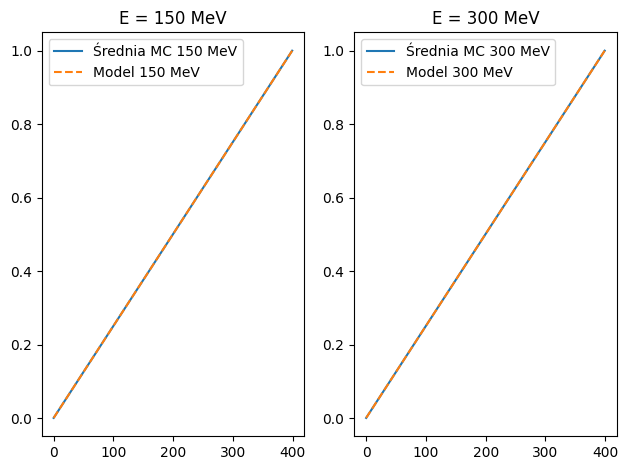

In [30]:
from matplotlib import pyplot as plt
unique_energies = np.unique(X.flatten())
unique_energies = [150,300]
avg_profiles = {}
for E in unique_energies:
    mask = (X.flatten() == E)
    avg_profiles[E] = Y_norm[mask].mean(axis=0)

pred_profiles = {}

for E in unique_energies:
    En = (np.array([[E]]) - E_mean) / E_std  # normalizacja energii
    pred_profiles[E] = model.predict(En)[0]

for i, E in enumerate(unique_energies):
    plt.subplot(1, len(unique_energies), i+1)
    plt.plot(avg_profiles[E], label=f"Średnia MC {E} MeV")
    plt.plot(pred_profiles[E], '--', label=f"Model {E} MeV")
    plt.legend()
    plt.title(f"E = {E} MeV")

plt.tight_layout()
plt.show()
